## Principle Component Analysis
PCA is used for feature reduction. Also, useful for visualization or getting slow running algorithms a smaller dataset to work on. Considered *unsupervised* as there is no labelled data to train from.

Remember to standardize the data before running PCA.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import (datasets, decomposition, ensemble, 
                     metrics, model_selection, preprocessing)

In [2]:
iris = datasets.load_iris()
target = pd.Series(iris.target)
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = target


In [3]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# 4 columns of data (cm), going to use PCA
# with 4 columns of result.
# The explained_variance_ratio_ tells us that
# by using 1 principal component, we will get
# 73% of the variance
X = iris_df.iloc[:, :4]
X_s = preprocessing.StandardScaler().fit_transform(X)
pca4 = decomposition.PCA(n_components=None)
res4 = pca4.fit_transform(X_s)
pca4.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

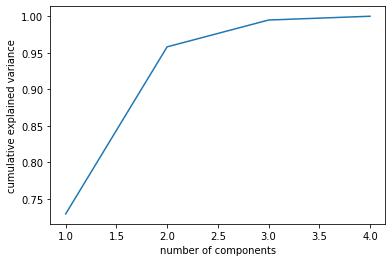

In [5]:
x = list(range(1, 1 + len(pca4.explained_variance_ratio_)))
plt.plot(x, np.cumsum(pca4.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
#plt.gca().invert_yaxis()
plt.show()

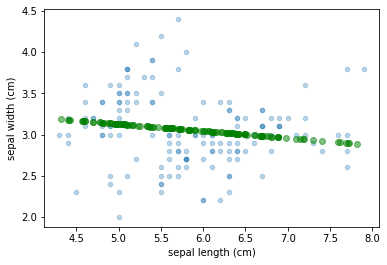

In [6]:
# 1D visualization of PCA
# (first 2 columns of iris)
xy = dict(zip('xy', iris_df.columns[:2]))
X = iris_df.iloc[:,:2]
X.plot(kind='scatter', **xy, alpha=.3)
pca1 = decomposition.PCA(n_components=1)
res = pca1.fit_transform(X)
flat = pca1.inverse_transform(res)
plt.scatter(flat[:, 0], flat[:, 1], c='g', alpha=.5);

In [7]:
# explained variance - How much of the variance is explained by 
# each of the principal components
pca1.explained_variance_ratio_

array([0.78716571])

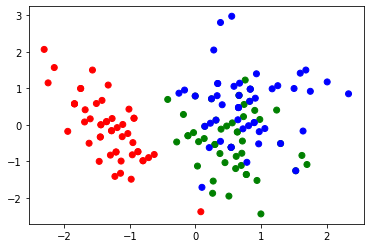

In [8]:
# Plotting with matplotlib
# PCA with 2 Dimensions
y = iris_df.iloc[:, [-1]]
colors = ['rgb'[idx] for idx in y.target]
X_s = preprocessing.StandardScaler().fit_transform(X)
pca2 = decomposition.PCA(n_components=2)
res2 = pca2.fit_transform(X_s)
plt.scatter(res2[:, 0], res2[:, 1], c=colors);

In [9]:
pca2.explained_variance_ratio_

array([0.55878489, 0.44121511])

In [12]:
print(iris_df.iloc[:])

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  